In [35]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.models as model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv')
df.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [37]:
df = df.drop('row_id', axis=1)

In [38]:
print(df.columns)

Index(['sequence_type', 'sequence_id', 'sequence_counter', 'subject',
       'orientation', 'behavior', 'phase', 'gesture', 'acc_x', 'acc_y',
       ...
       'tof_5_v54', 'tof_5_v55', 'tof_5_v56', 'tof_5_v57', 'tof_5_v58',
       'tof_5_v59', 'tof_5_v60', 'tof_5_v61', 'tof_5_v62', 'tof_5_v63'],
      dtype='object', length=340)


In [39]:
grouped_df = df.groupby('sequence_id')
i = 0

# _lgd_list = []
# for gd in grouped_df:
#     lgd = list(gd)

#     print(lgd[0])

#     print(lgd[0], (lgd[1]))
#     _lgd_list.append(len(lgd[1]))

#     break
    

# print(max(_lgd_list))
# print(min(_lgd_list))

# plt.plot(_lgd_list)
# plt.show()

# plt.hist(_lgd_list)
# plt.show()

d = list(grouped_df)
print(d[0], d[1])
print(len(d))

('SEQ_000007',    sequence_type sequence_id  sequence_counter      subject  \
0         Target  SEQ_000007                 0  SUBJ_059520   
1         Target  SEQ_000007                 1  SUBJ_059520   
2         Target  SEQ_000007                 2  SUBJ_059520   
3         Target  SEQ_000007                 3  SUBJ_059520   
4         Target  SEQ_000007                 4  SUBJ_059520   
5         Target  SEQ_000007                 5  SUBJ_059520   
6         Target  SEQ_000007                 6  SUBJ_059520   
7         Target  SEQ_000007                 7  SUBJ_059520   
8         Target  SEQ_000007                 8  SUBJ_059520   
9         Target  SEQ_000007                 9  SUBJ_059520   
10        Target  SEQ_000007                10  SUBJ_059520   
11        Target  SEQ_000007                11  SUBJ_059520   
12        Target  SEQ_000007                12  SUBJ_059520   
13        Target  SEQ_000007                13  SUBJ_059520   
14        Target  SEQ_000007            

In [40]:
print(len(_lgd_list))

1


# Handle Categorical data

In [41]:
obj_cols = [col for col in df.columns if df[col].dtype == 'object']
print(obj_cols)

['sequence_type', 'sequence_id', 'subject', 'orientation', 'behavior', 'phase', 'gesture']


In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

reverse_sequence_type = []
reverse_gesture = []

for col in obj_cols:
    df[col] = encoder.fit_transform(df[col])
    if col == 'sequence_type':
        reverse_sequence_type = list(encoder.classes_)
    elif col == 'gesture':
        reverse_gesture = list(encoder.classes_)

print(df[obj_cols].head())

   sequence_type  sequence_id  subject  orientation  behavior  phase  gesture
0              1            0       73            2         3      1        1
1              1            0       73            2         3      1        1
2              1            0       73            2         3      1        1
3              1            0       73            2         3      1        1
4              1            0       73            2         3      1        1


In [43]:
print(reverse_sequence_type)
print(reverse_gesture)

['Non-Target', 'Target']
['Above ear - pull hair', 'Cheek - pinch skin', 'Drink from bottle/cup', 'Eyebrow - pull hair', 'Eyelash - pull hair', 'Feel around in tray and pull out an object', 'Forehead - pull hairline', 'Forehead - scratch', 'Glasses on/off', 'Neck - pinch skin', 'Neck - scratch', 'Pinch knee/leg skin', 'Pull air toward your face', 'Scratch knee/leg skin', 'Text on phone', 'Wave hello', 'Write name in air', 'Write name on leg']


# Filling Missing Values

In [44]:
df = df.fillna(method='ffill')
print(df.isna().sum())

/tmp/ipykernel_35/2240921425.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


sequence_type       0
sequence_id         0
sequence_counter    0
subject             0
orientation         0
                   ..
tof_5_v59           0
tof_5_v60           0
tof_5_v61           0
tof_5_v62           0
tof_5_v63           0
Length: 340, dtype: int64


In [56]:
class CMIDataset(Dataset):
    """
        Gives 2 things data and target.
        data contains all the columns except, sequence_type and gesture
        target contains sequence_type and gesture.

        sequence_type has 2 classes: Target (BFRB), Non-Target(Non BFRB)
        gesture
    """
    
    def __init__(self):
        super().__init__()

        self.data = df
        self.data = self.data.groupby('sequence_id')
        self.data = list(self.data)
        

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        d = self.data[idx][1]
        x = d.drop(['sequence_type', 'gesture'], axis=1).values
        y = d[['sequence_type', 'gesture']].values

        x = torch.from_numpy(x)
        y = torch.from_numpy(y)

        # print(type(x))
        # print(d)

        return x, y[0]

In [57]:
dataset = CMIDataset()

In [58]:
x, y = dataset[0]
print(x, x.shape)
print(y, y.shape)

tensor([[  0.,   0.,  73.,  ...,  -1.,  -1.,  -1.],
        [  0.,   1.,  73.,  ...,  -1.,  -1.,  -1.],
        [  0.,   2.,  73.,  ...,  -1.,  -1.,  -1.],
        ...,
        [  0.,  54.,  73.,  ..., 105.,  98.,  95.],
        [  0.,  55.,  73.,  ..., 102.,  96.,  94.],
        [  0.,  56.,  73.,  ...,  98.,  96.,  94.]], dtype=torch.float64) torch.Size([57, 338])
tensor([1, 1]) torch.Size([2])


In [59]:
batch_size=16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [61]:
for d in dataloader:
    print(d)
    break

RuntimeError: stack expects each tensor to be equal size, but got [61, 338] at entry 0 and [51, 338] at entry 1

As each data size is of different size. Thus creating a batched dataset (dataloader) will be difficult. 

[]

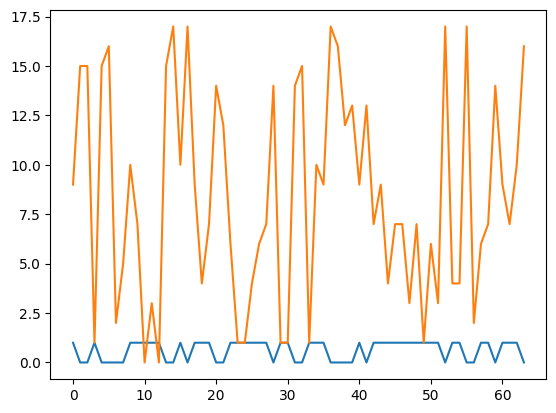

In [13]:
plt.plot(d[1])
plt.plot()

In [14]:
c=np.array(d[1])
x=0
for i in range(len(c)):
    x=x+c[i][0]

In [15]:
x

40.0

In [16]:
all_models = model.list_models()
for m in all_models:
    print(m)

alexnet
convnext_base
convnext_large
convnext_small
convnext_tiny
deeplabv3_mobilenet_v3_large
deeplabv3_resnet101
deeplabv3_resnet50
densenet121
densenet161
densenet169
densenet201
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
efficientnet_b4
efficientnet_b5
efficientnet_b6
efficientnet_b7
efficientnet_v2_l
efficientnet_v2_m
efficientnet_v2_s
fasterrcnn_mobilenet_v3_large_320_fpn
fasterrcnn_mobilenet_v3_large_fpn
fasterrcnn_resnet50_fpn
fasterrcnn_resnet50_fpn_v2
fcn_resnet101
fcn_resnet50
fcos_resnet50_fpn
googlenet
inception_v3
keypointrcnn_resnet50_fpn
lraspp_mobilenet_v3_large
maskrcnn_resnet50_fpn
maskrcnn_resnet50_fpn_v2
maxvit_t
mc3_18
mnasnet0_5
mnasnet0_75
mnasnet1_0
mnasnet1_3
mobilenet_v2
mobilenet_v3_large
mobilenet_v3_small
mvit_v1_b
mvit_v2_s
quantized_googlenet
quantized_inception_v3
quantized_mobilenet_v2
quantized_mobilenet_v3_large
quantized_resnet18
quantized_resnet50
quantized_resnext101_32x8d
quantized_resnext101_64x4d
quantized_shufflenet_v2_x0_

# Models

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SOTABinaryClassifier(nn.Module):
    def __init__(self, input_dim=338, hidden_dim=512, dropout=0.2, num_blocks=4):
        super(SOTABinaryClassifier, self).__init__()

        self.input_norm = nn.LayerNorm(input_dim)
        self.input_proj = nn.Linear(input_dim, hidden_dim)

        self.blocks = nn.Sequential(*[
            ResidualMLPBlock(hidden_dim, dropout)
            for _ in range(num_blocks)
        ])

        self.classifier = nn.Sequential(
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.input_norm(x)
        x = self.input_proj(x)
        x = self.blocks(x)
        return self.classifier(x)


class ResidualMLPBlock(nn.Module):
    def __init__(self, dim, dropout=0.2):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.ffn = nn.Sequential(
            nn.Linear(dim, dim * 2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(dim * 2, dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return x + self.ffn(self.norm1(x))  # Residual connection

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [21]:
model = SOTABinaryClassifier(input_dim=338).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [27]:
from tqdm import tqdm
epochs = 1

for epoch in tqdm(range(epochs)):
    model.train()
    cnt = 0
    for X_batch, y_batch in dataloader:
        X_batch = X_batch.to(device).float()
        y_batch = y_batch.to(device).float()
        
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()

        # print(outputs)
        loss = criterion(outputs, y_batch[:, 0].float())
        loss.backward()
        optimizer.step()


        print(cnt, loss)
        cnt += 1
    


  0%|          | 0/1 [00:00<?, ?it/s]

0 tensor(0.5377, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
1 tensor(0.6398, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
2 tensor(0.5638, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
3 tensor(0.5847, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
4 tensor(0.5530, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
5 tensor(0.6455, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
6 tensor(0.5490, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
7 tensor(0.6325, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
8 tensor(0.4482, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
9 tensor(0.5223, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
10 tensor(0.6793, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
11 tensor(0.6131, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
12 tensor(0.5622, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
13 tensor(0.5294, device='cuda:0', grad_fn=<Bina

  0%|          | 0/1 [02:30<?, ?it/s]

2784 tensor(0.4643, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
2785 tensor(0.5080, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)


KeyboardInterrupt: 